In [2]:
import os
import neat
import visualize

In [3]:
xorInputs = [(0,0), (0, 1), (1, 0), (1, 1)]
xorOutputs = [ (0.0,), (1.0,), (1.0,), (0.0,)]

In [4]:
def eval_function(net):
    score = 0
    for xi, xo in zip(xorInputs, xorOutputs):
        output = net.activate(xi)[0]
        # print(f"{output} is output, {xo[0]} is xo")
        
        if output > 0.5:
            output = 1
        else:
            output = 0
        if output == xo[0]:
            score += 1
            
    # print(score)
    return (score ** 2)

In [5]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        genome.fitness = eval_function(net)

In [11]:
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, "./xor_config.ini")

In [12]:
p = neat.Population(config)

In [13]:
# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5, 
           filename_prefix='out/neat-checkpoint-'))

In [14]:
best_genome = p.run(eval_genomes, 300)



 ****** Running generation 0 ****** 

Population's average fitness: 4.20667 stdev: 2.03731
Best fitness: 9.00000 - size: (3, 8) - species 4 - id 5
Average adjusted fitness: 0.443
Mean genetic distance 3.020, standard deviation 0.456
Population of 301 members in 35 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    24      9.0    0.478     0
     2    0    33      9.0    0.444     0
     3    0     6      4.0    0.411     0
     4    0     5      9.0    0.556     0
     5    0     5      4.0    0.444     0
     6    0     9      9.0    0.556     0
     7    0     3      9.0    0.514     0
     8    0     4      4.0    0.370     0
     9    0    80      9.0    0.553     0
    10    0     3      4.0    0.444     0
    11    0     1      9.0    0.462     0
    12    0     9      9.0    1.000     0
    13    0     4      9.0    0.542     0
    14    0     4      9.0    0.722     0
    15    0     5      4.0    0.444     0
    16    0

In [15]:
round(0.999)

1

In [16]:
best_genome_fitness = eval_function(neat.nn.FeedForwardNetwork.create(best_genome, config))
if best_genome_fitness > config.fitness_threshold:
    print("\n\nSUCCESS: The XOR problem solver found!!!")
else:
    print("\n\nFAILURE: Failed to find XOR problem solver!!!")



SUCCESS: The XOR problem solver found!!!


In [17]:
5 **2

25

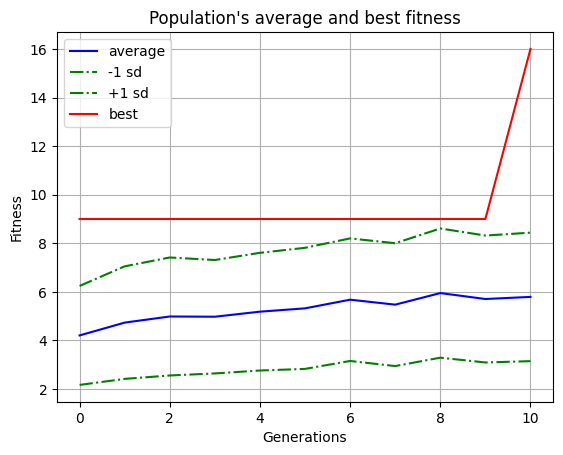

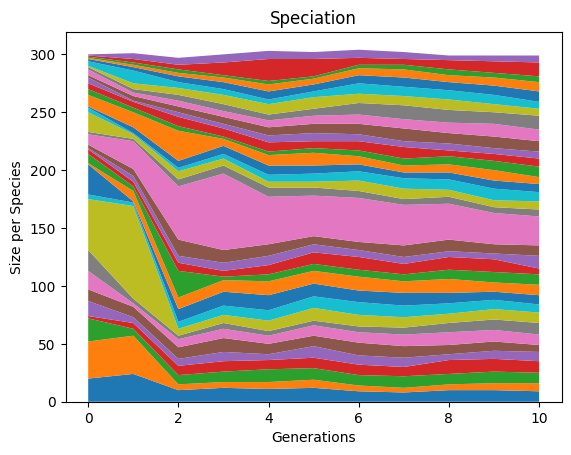


(pinta:155313): Gtk-WARNING **: 20:51:30.719: GtkBox 0x561966175400 (box) reported min width 514 and natural width 498 in measure() with for_size=704; natural size must be >= min size

(pinta:155313): Gtk-WARNING **: 20:51:30.921: GtkBox 0x561966175400 (box) reported min width 514 and natural width 508 in measure() with for_size=704; natural size must be >= min size

(pinta:155313): Gtk-WARNING **: 20:51:30.939: GtkBox 0x561966175400 (box) reported min width 514 and natural width 506 in measure() with for_size=704; natural size must be >= min size

(pinta:155313): Gtk-WARNING **: 20:51:30.948: GtkBox 0x561966175400 (box) reported min width 514 and natural width 507 in measure() with for_size=704; natural size must be >= min size

(pinta:155313): Gtk-WARNING **: 20:51:30.957: GtkBox 0x561966175400 (box) reported min width 514 and natural width 501 in measure() with for_size=704; natural size must be >= min size

(pinta:155313): Gtk-WARNING **: 20:51:31.131: GtkBox 0x561966175400 (box) 

In [18]:
out_dir = "./output_viz"
node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
visualize.draw_net(config, best_genome, True, 
   node_names=node_names, directory=out_dir)
visualize.plot_stats(stats, ylog=False, view=True, 
   filename=os.path.join(out_dir, 'avg_fitness.svg'))
visualize.plot_species(stats, view=True, 
   filename=os.path.join(out_dir, 'speciation.svg'))